In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

from datetime import datetime

In [ ]:
gen = ImageDataGenerator(rotation_range=15, shear_range=0.1,
                         width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
# CIFAR-10 dataset을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [ ]:
# 보강할 학습데이터 이미지 생성
augment_ratio = 1.5
augment_size = int(augment_ratio * x_train.shape[0])
print(augment_size)

# 전체 x_train 갯수의 150% 비율 만큼
randidx = np.random.randint(x_train.shape[0], size=augment_size)

# 임의로 선택된 데이터는 원본 데이터를 참조하기 때문에 원본 데이터에 영향을 줄 수 있음
# copy() 함수로 안전하게 복사본 생성
x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()
print(x_augmented.shape, y_augmented.shape)

# 이미지 보강 실행
x_augmented, y_augmented = gen.flow(x_augmented, y_augmented,
                                    batch_size=augment_size, shuffle=False).next()
print(x_augmented.shape, y_augmented.shape)

75000
(75000, 32, 32, 3) (75000, 1)
(75000, 32, 32, 3) (75000, 1)


In [ ]:
# x_train, y_train에 보강된 데이터 추가
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))
print(x_train.shape, y_train.shape)

(125000, 32, 32, 3) (125000, 1)


In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
               input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
start_time = datetime.now()

cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=Adam(), metrics=['accuracy'])

# 손실함수를 10 epochs 마다 검사하여 더 이상 줄어들지 않으면 종료
# EarlyStopping(모니터링 값, 대기 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 학습 중인 모델을 자동 저장
model_checkpoint = ModelCheckpoint(filepath='C:/python/machine/data/bast.h5',
                                   monitor='val_loss',
                                   save_base_only=True,
                                   verbose=1)

hist = cnn.fit(x_train, y_train, batch_size=256, epochs=250,
               validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

end_time = datetime.now()

print('경과시간 =', end_time - start_time)

Epoch 1/250
489/489 [==============================] - ETA: 0s - loss: 1.7472 - accuracy: 0.3474
Epoch 1: saving model to data/bast.h5
489/489 [==============================] - 17s 28ms/step - loss: 1.7472 - accuracy: 0.3474 - val_loss: 1.3130 - val_accuracy: 0.5234
Epoch 2/250
488/489 [============================>.] - ETA: 0s - loss: 1.2993 - accuracy: 0.5355
Epoch 2: saving model to data/bast.h5
489/489 [==============================] - 14s 28ms/step - loss: 1.2993 - accuracy: 0.5355 - val_loss: 1.0385 - val_accuracy: 0.6283
Epoch 3/250
487/489 [============================>.] - ETA: 0s - loss: 1.1115 - accuracy: 0.6093
Epoch 3: saving model to data/bast.h5
489/489 [==============================] - 13s 28ms/step - loss: 1.1113 - accuracy: 0.6093 - val_loss: 0.8741 - val_accuracy: 0.6910
Epoch 4/250
488/489 [============================>.] - ETA: 0s - loss: 0.9846 - accuracy: 0.6599
Epoch 4: saving model to data/bast.h5
489/489 [==============================] - 13s 27ms/step - lo

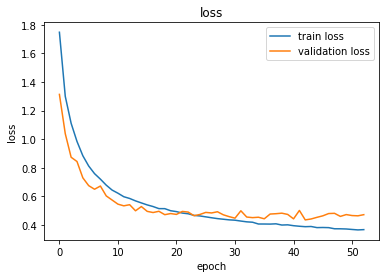

In [ ]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

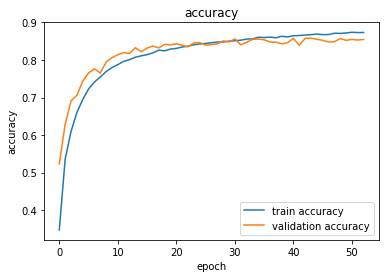

In [ ]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()